<h1> Optical Character Recognition </h1>

OCR  is a technology that converts scanned documents or images into editable and searchable text. It helps analyze documents by extracting text, enabling tasks such as search, data extraction, document classification, translation, sentiment analysis, and fraud detection. OCR automates document processing, improving efficiency, accessibility for visually impaired individuals, and providing insights from document content.

## Image Registration

Image registration is a process of aligning two or more images of the same scene taken at different times, from different viewpoints, or by different sensors. The goal is to geometrically align these images so that corresponding features in the scene match up. This alignment enables comparison, analysis, and integration of information from multiple images.

Image registration is an example of a Feature detection and Matching problem. So, all the stages in the feature detection and matching pipeline: feature detection, feature description, feature matching are involved in this problem.



In [3]:
# Importing required libraries
import cv2
import matplotlib.pyplot as plt
import json
import numpy as np

# Setting matplotlib configurations globally
plt.rcParams['xtick.labelsize'] = 0
plt.rcParams['ytick.labelsize'] = 0
plt.rcParams['xtick.bottom'] = False
plt.rcParams['ytick.left'] = False

In [2]:
ref_image_path = 'reference.png'
query_image_path = 'data_rotate.png'

# Load reference and query images
ref_image_bgr = cv2.imread(ref_image_path)
query_image_bgr = cv2.imread(query_image_path)

In [19]:
def show_img(image, title=None, ncols=2, figsize=(12, 15)):
    '''
    Visualize an image or a set of images using subplot

    Parameters
    ----------
    image : numpy.ndarray or list of numpy.ndarray
             Image array or the collection of image arrays to be displayed
    title : str ot list of str, optional, default: None
            The title or collection of titles corresponding to the images
    ncols: int, optional, default: 2
           Number of columns for subplot
    figsize: (float, float), optional, default: (12, 15)
             width, height in inches for single image

    Returns
    -------
    None
    '''

    if not isinstance(image, list):
        plt.figure(figsize=figsize)
        plt.imshow(image)
        if title:
            plt.title(title, fontsize=30)
    else:
        plt.figure(figsize=(50, 75))
        # calculate the number of rows
        nrows = int(np.ceil((len(image)) / ncols))
        for i, img in enumerate(image):
            plt.subplot(nrows, ncols, i+1)
            plt.imshow(img)
            if title:
                plt.title(title[i], fontsize=50)
    plt.show()

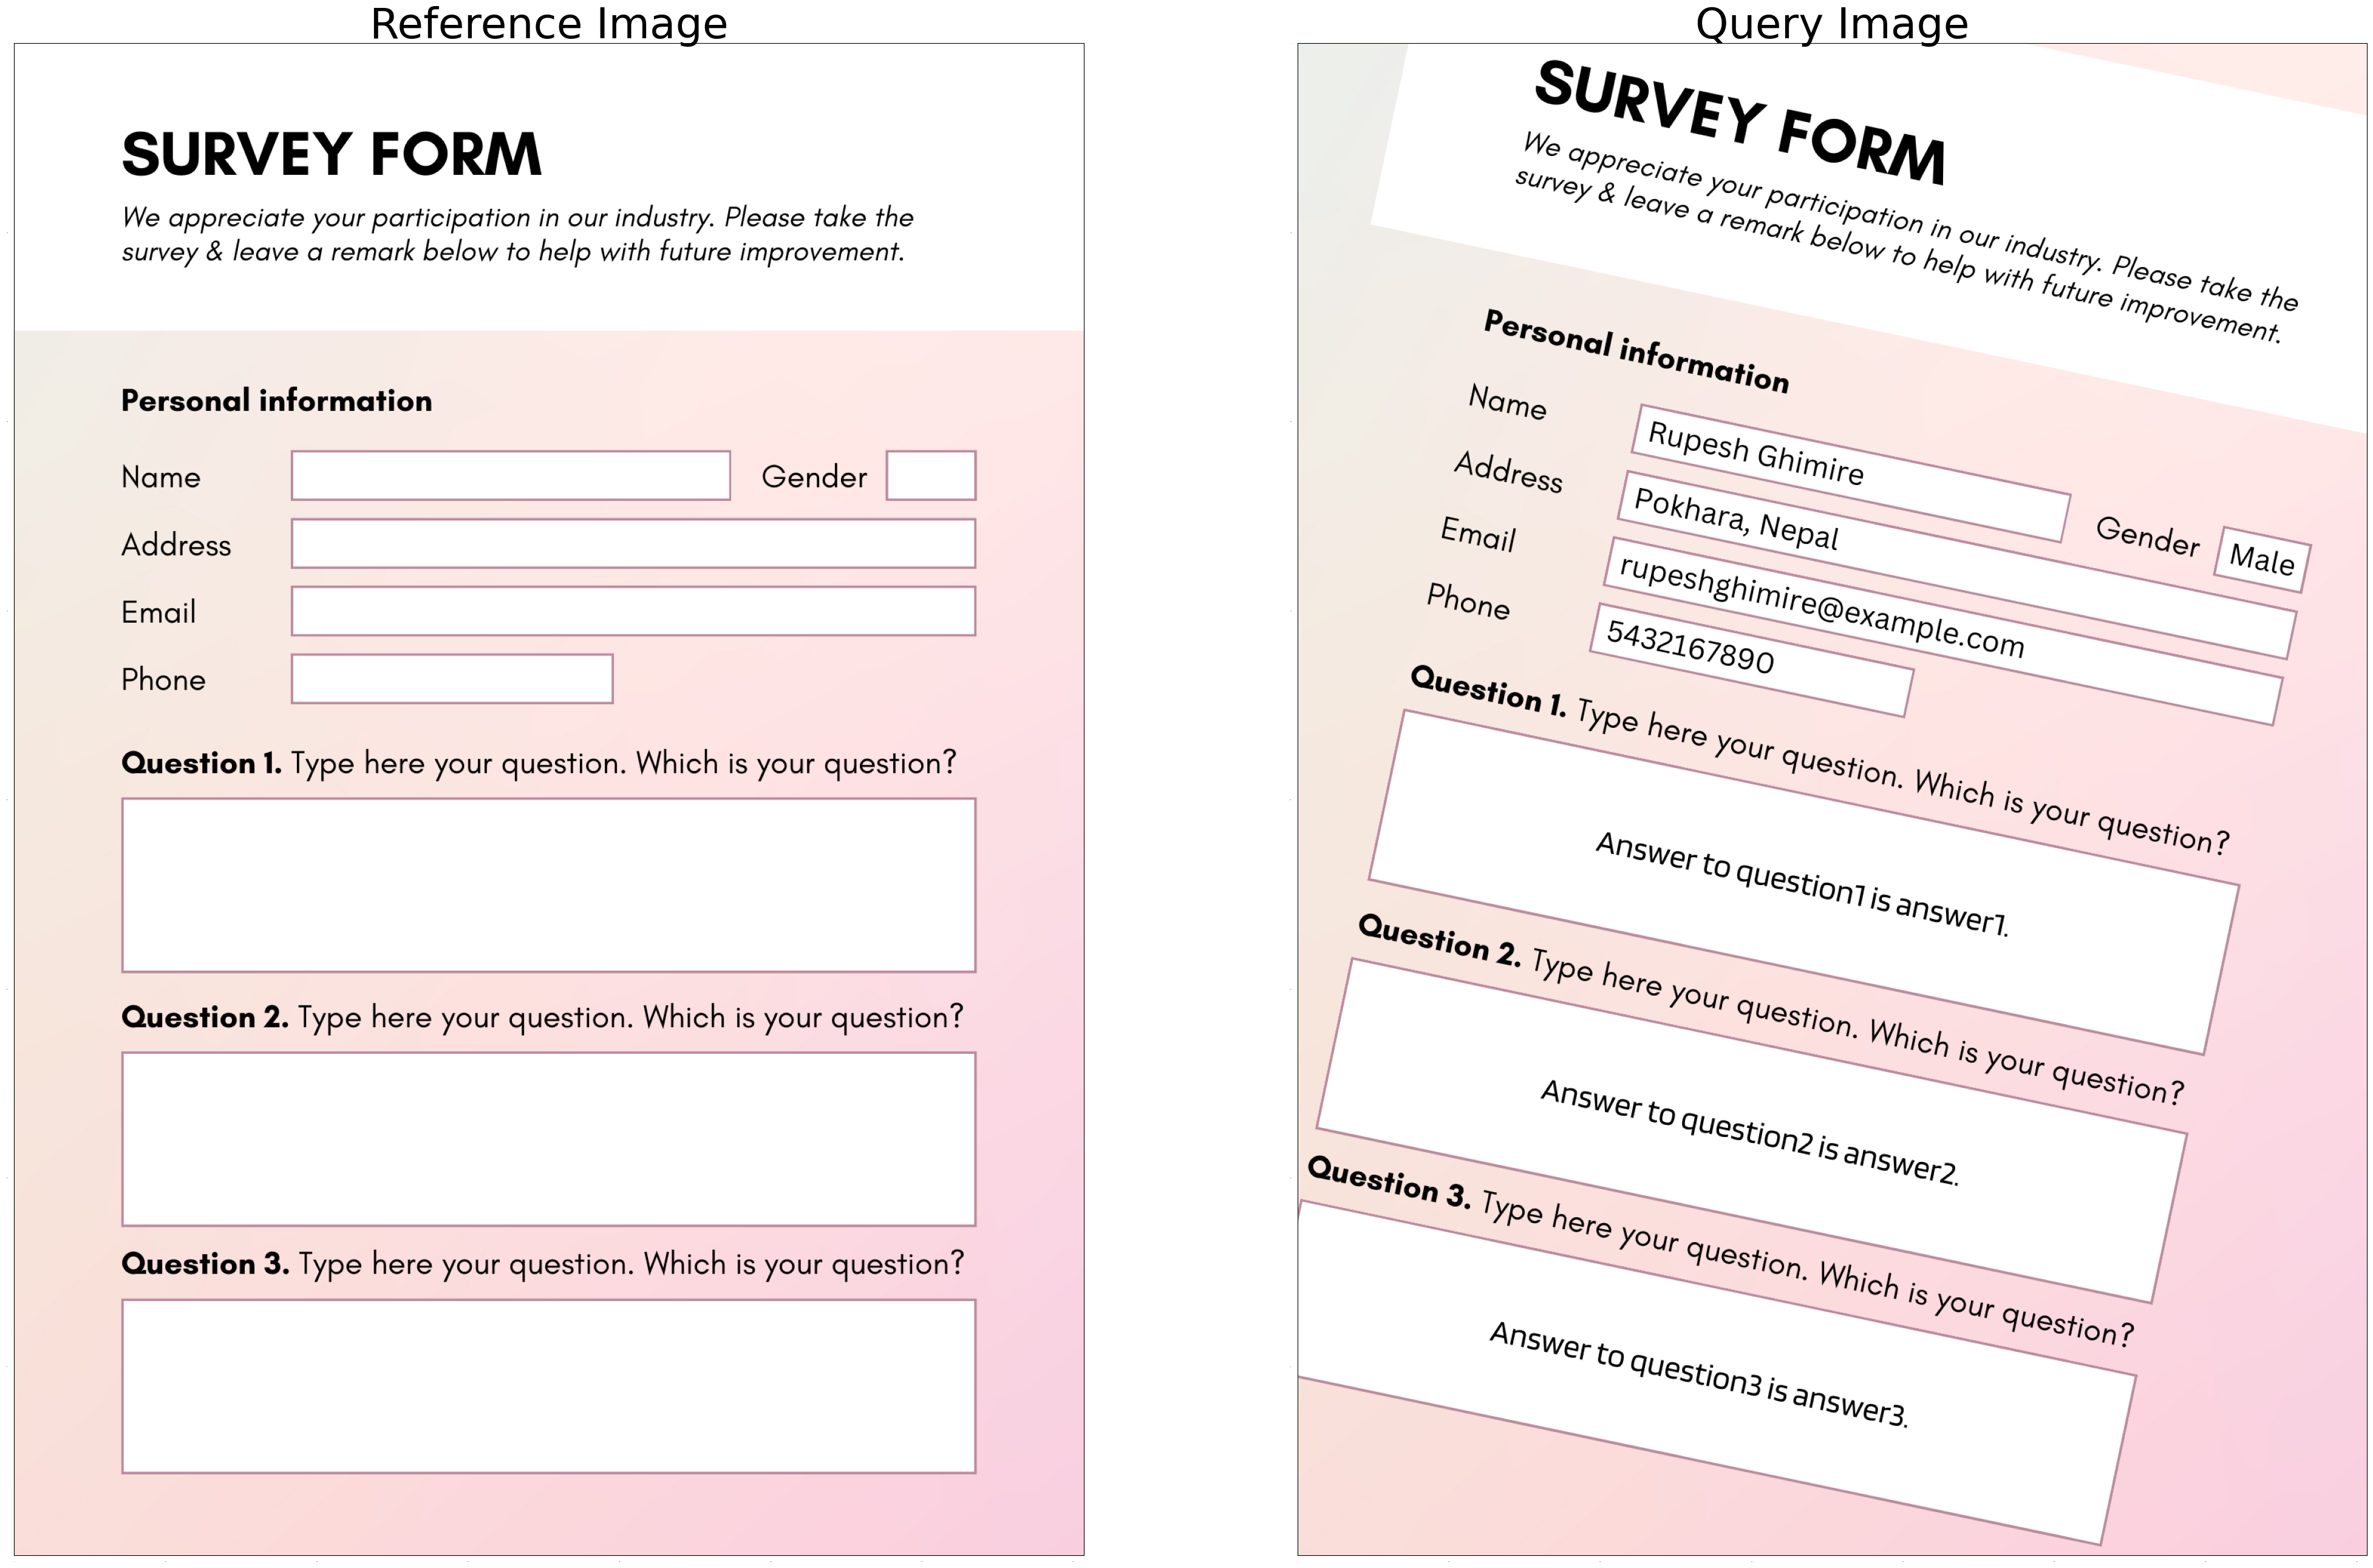

In [20]:
# Convert images from BGR to RGB
ref_image = cv2.cvtColor(ref_image_bgr, cv2.COLOR_BGR2RGB)
query_image = cv2.cvtColor(query_image_bgr, cv2.COLOR_BGR2RGB)

show_img([ref_image, query_image],
       ['Reference Image', 'Query Image'])

# Load, Extract, and Visualize the ROIs

Region of interest are portions of images where we need to perform some operations. In this project, ROIs are areas in the image from which the text needs to be extracted.

Constructed a json file that has informations about ROIs corresponding to the reference image. It has top-left coordinate of ROI followed by height and width of the rectangle making up ther ROI. It has names and other features.

```shape_attributes```: contain information about the rectangle boundary

```region_attributes```: contain information about the image and roi label

In [15]:
from pprint import pprint
import json as json


file_path='/content/roi_config.json'


try:
    with open(file_path, "r") as f:
        content = f.read()
        if content.strip() == "":
            print("Error: File is empty.")
        else:
            config = json.loads(content)["config"]
            rois = config["rois"]
            pprint(rois)
except FileNotFoundError:
    print("Error: File not found.")
except json.JSONDecodeError as e:
    print("Error decoding JSON:", e)

[{'region_attributes': {'image_quality': {'frontal': True,
                                          'good': True,
                                          'good_illumination': True},
                        'name': 'name',
                        'type': 'unknown'},
  'shape_attributes': {'height': 65,
                       'name': 'rect',
                       'width': 582,
                       'x': 364,
                       'y': 543}},
 {'region_attributes': {'image_quality': {'frontal': True,
                                          'good': True,
                                          'good_illumination': True},
                        'name': 'gender',
                        'type': 'unknown'},
  'shape_attributes': {'height': 65,
                       'name': 'rect',
                       'width': 116,
                       'x': 1155,
                       'y': 537}},
 {'region_attributes': {'image_quality': {'frontal': True,
                                      

In [23]:
def get_fields(image, rois, save_rois=False):
    '''
    Takes image, using roi_config.json file generated dict of rois, saves them in field according to their:
    name, boundary(top left and bottom right coordinates) and roi_image which is portion of image within those coordinates.
    Returns fields which is list of dictionaries of ROI data
    '''

    print("Cropping image rois.\n")
    fields = []
    for roi in rois:
        k, v = roi['region_attributes']['name'], roi['shape_attributes']

        x1 = int(v['x'])
        x2 = int(x1) + int(v['width'])
        y1 = int(v['y'])
        y2 = int(y1) + int(v['height'])

        roi_image = image[y1:y2, x1:x2]

        if save_rois:
            cv2.imwrite(f"rois/{k}.jpg", roi_image)

        fields.append({'roi_label': k,
                       'roi_boundary': [(x1, y1), (x2, y2)] ,
                       'roi_image': roi_image})

        print("ROI: {} added".format(k))

    print("\nDone Cropping image rois.\n")
    if save_rois:
        print("Cropped ROI Images saved at path: rois/")
    return fields

In [24]:
def visualize_rois(image):
    """
    Takes image, makes it's copy, gets ROI fields as described in json file, adds ROIs as rectangle and plots the image
    Returns the ROI boxed/annotated image
    """

    # Avoid in place changes to the image
    image = image.copy()

    # Create the ROIs information
    roi_fields = get_fields(image, rois)

    # Define attributes for rectangle
    color = (0, 0, 255)  # rgb -> blue
    thickness = 3

    # Draw all roi bounding boxes
    for roi_field in roi_fields:

        a,b = roi_field["roi_boundary"]
        image = cv2.rectangle(image,a,b,color,thickness)


    show_img(image, "Reference image with ROIs")

    return image

Cropping image rois.

ROI: name added
ROI: gender added
ROI: address added
ROI: email added
ROI: phone added
ROI: question1 added
ROI: question2 added
ROI: question3 added

Done Cropping image rois.



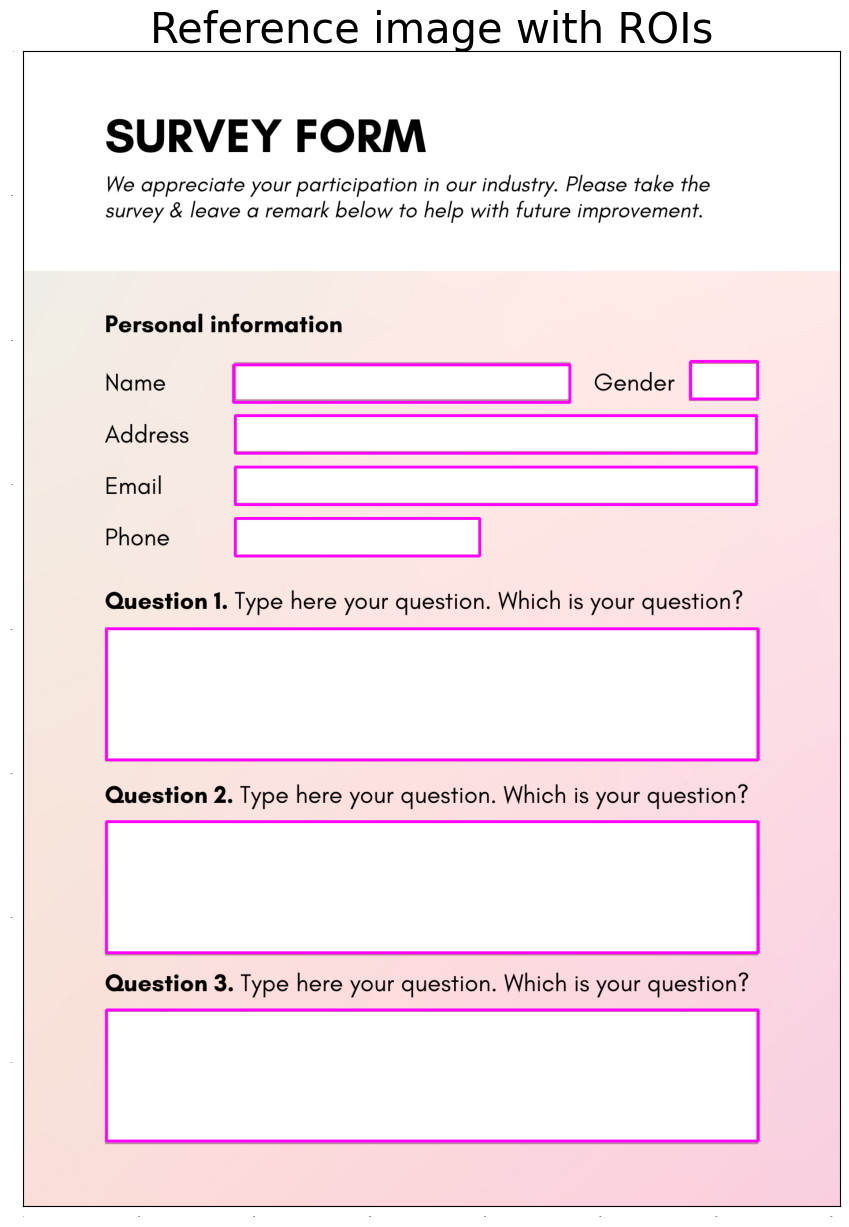

In [25]:
ref_roi_image = visualize_rois(ref_image)
